In [13]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim, compare_psnr
import random

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_style('darkgrid')

In [2]:
def compute_psnr(path_im1, path_im2):
    im1 = cv2.imread(path_im1)
    im2 = cv2.imread(path_im2)
    psnr = compare_psnr(im1, im2)
    return psnr

In [3]:
def compute_ssim(path_im1, path_im2):
    im1 = cv2.imread(path_im1)
    im2 = cv2.imread(path_im2)
    ssim = compare_ssim(im1, im2, multichannel=True)
    return ssim

In [4]:
INTERPOLATED_DAIN_PATH = 'interpolated-dain'
INTERPOLATED_SEPCONV_PATH = 'interpolated-sepconv'
GT_PATH = 'result'

In [5]:
list_psnr = []
list_ssim = []
for dirs in os.listdir(INTERPOLATED_DAIN_PATH):
    if(dirs == '.DS_Store'):
        continue
    for image in os.listdir(os.path.join(INTERPOLATED_DAIN_PATH, dirs)):
        gt_img = os.path.join(GT_PATH, image)
        pred_img = os.path.join(INTERPOLATED_DAIN_PATH, dirs, image)
        list_psnr.append(compute_psnr(pred_img, gt_img))
        list_ssim.append(compute_ssim(pred_img, gt_img))

print('Mean PSNR: ', np.mean(list_psnr))
print('Mean SSIM: ', np.mean(list_ssim))

Mean PSNR:  35.04515560502454
Mean SSIM:  0.9247097142048158


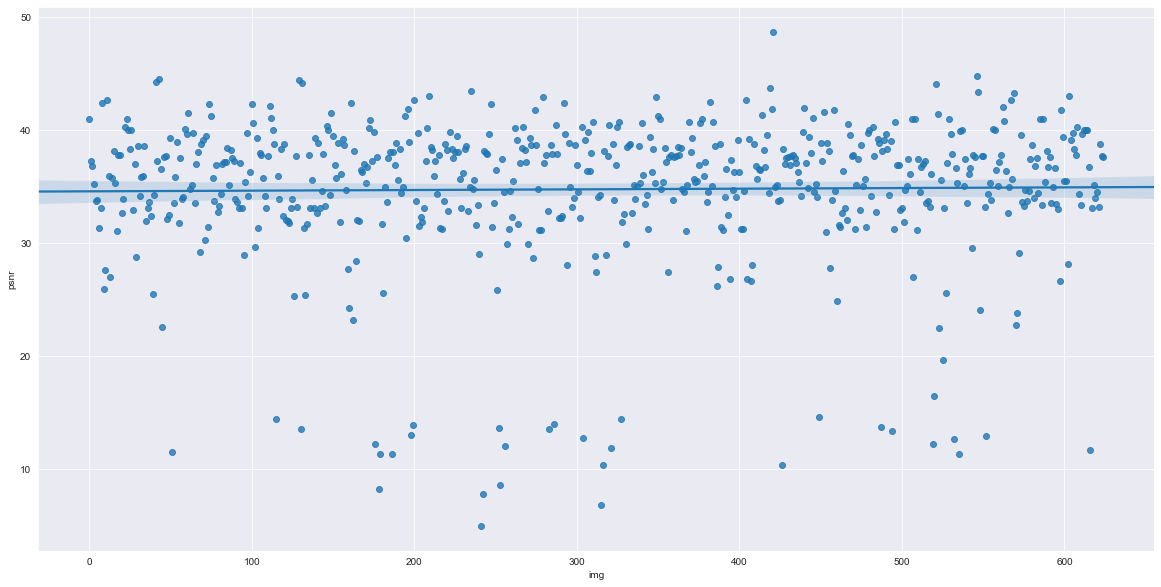

In [14]:
psnr_df = pd.DataFrame.from_dict({'img': list(range(len(list_psnr))), 'psnr': list_psnr})
sns.regplot(data=psnr_df, x='img', y='psnr')

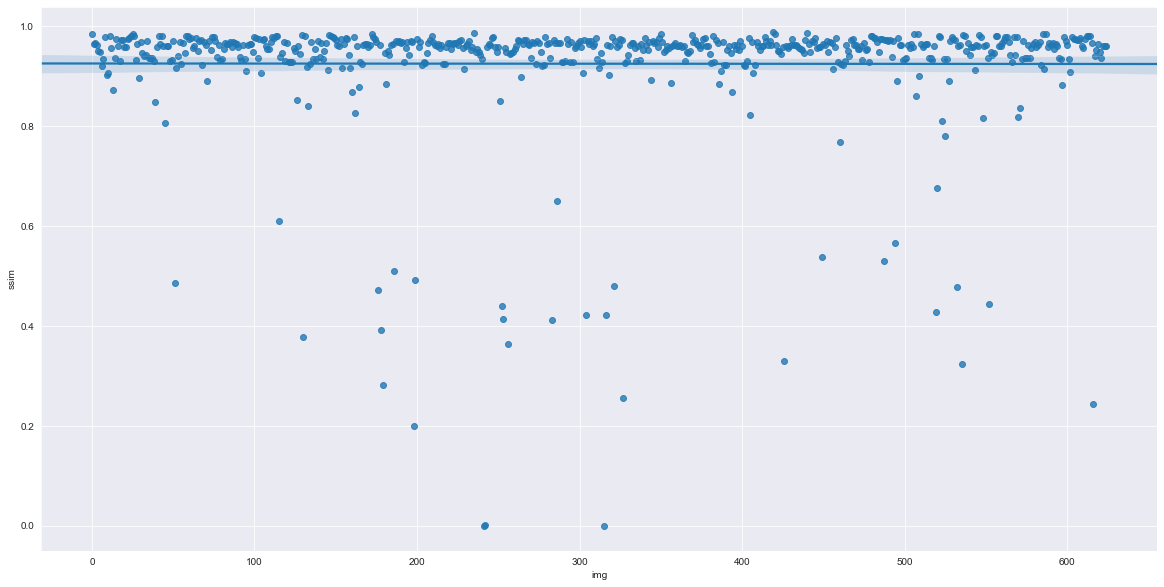

In [15]:
ssim_df = pd.DataFrame.from_dict({'img': list(range(len(list_psnr))), 'ssim': list_ssim})
sns.regplot(data=ssim_df, x='img', y='ssim')

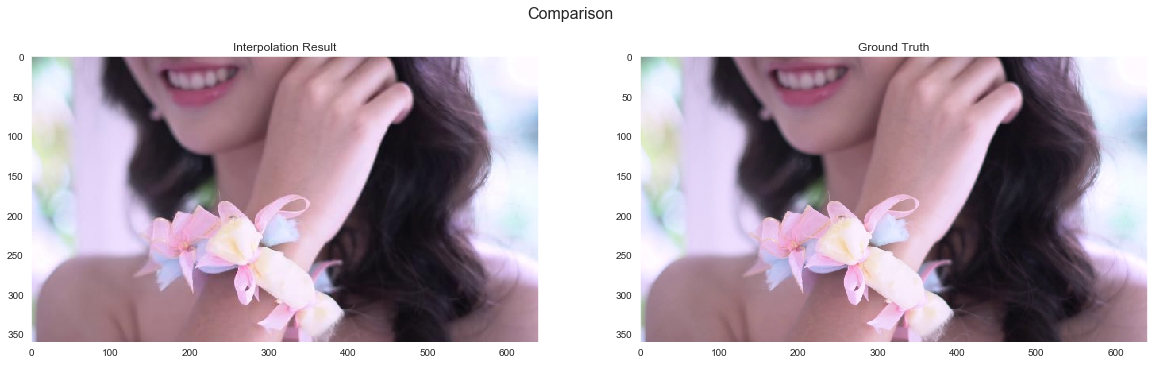

In [24]:
folder = random.randint(0, len(os.listdir(INTERPOLATED_DAIN_PATH)))
subdir_inter = os.path.join(INTERPOLATED_DAIN_PATH, 'frames_'+str(folder))
image = os.listdir(subdir_inter)[0]
image_inter = cv2.imread(os.path.join(subdir_inter, image))
image_gt = cv2.imread(os.path.join(GT_PATH, image))

f, axarr = plt.subplots(1,2)
f.subplots_adjust(top=1.3)
f.suptitle('Comparison', fontsize=16)
axarr[0].imshow(cv2.cvtColor(image_inter, cv2.COLOR_BGR2RGB))
axarr[0].grid(False)
axarr[0].title.set_text('Interpolation Result')
axarr[1].imshow(cv2.cvtColor(image_gt, cv2.COLOR_BGR2RGB))
axarr[1].grid(False)
axarr[1].title.set_text('Ground Truth')
plt.show()

In [9]:
list_psnr = []
list_ssim = []
for image in os.listdir(INTERPOLATED_SEPCONV_PATH):
    if(image == '.DS_Store'):
        continue
    gt_img = os.path.join(GT_PATH, image)
    pred_img = os.path.join(INTERPOLATED_SEPCONV_PATH, image)
    list_psnr.append(compute_psnr(pred_img, gt_img))
    list_ssim.append(compute_ssim(pred_img, gt_img))

print('============SEPCONV============')
print('Mean PSNR: ', np.mean(list_psnr))
print('Mean SSIM: ', np.mean(list_ssim))

============SEPCONV============
Mean PSNR:  34.77478963470404
Mean SSIM:  0.9246911502169929


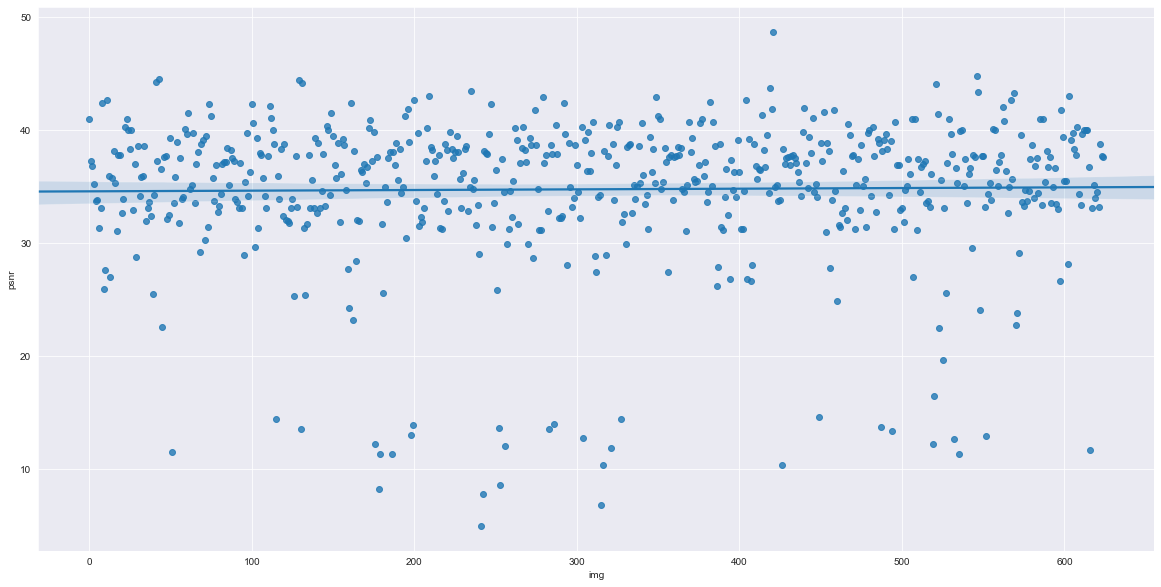

In [17]:
psnr_df = pd.DataFrame.from_dict({'img': list(range(len(list_psnr))), 'psnr': list_psnr})
sns.regplot(data=psnr_df, x='img', y='psnr')

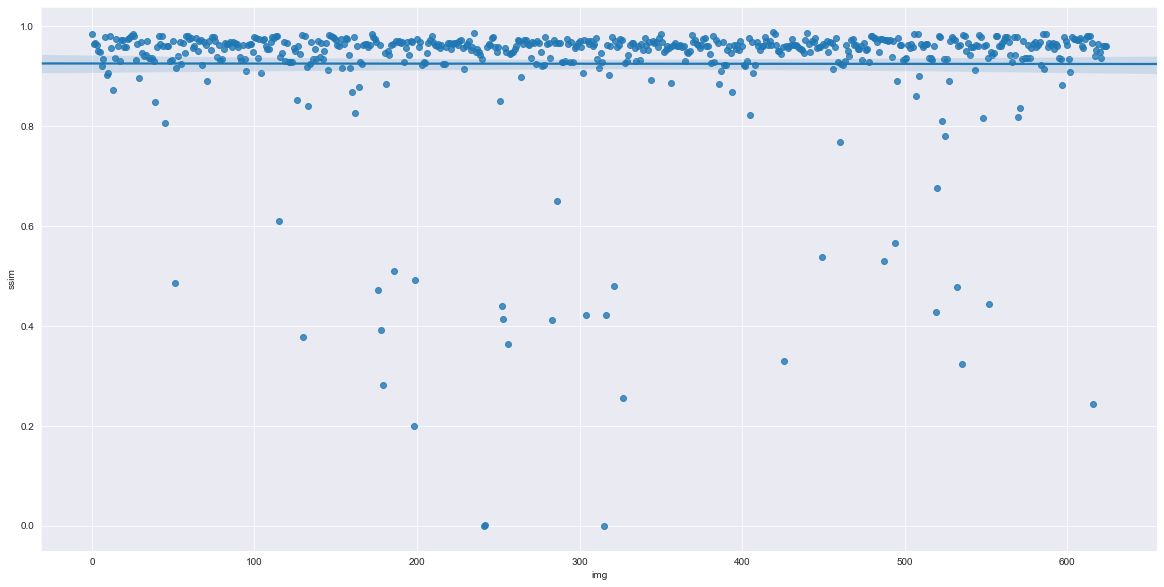

In [18]:
ssim_df = pd.DataFrame.from_dict({'img': list(range(len(list_psnr))), 'ssim': list_ssim})
sns.regplot(data=ssim_df, x='img', y='ssim')

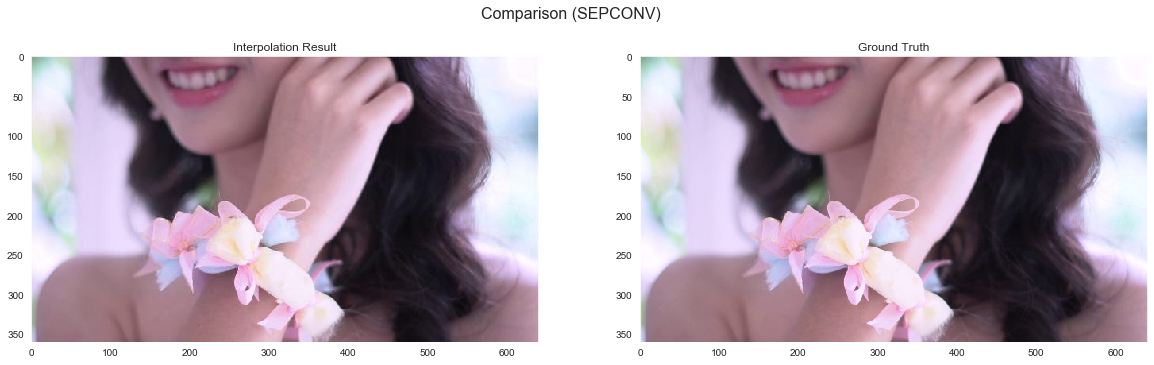

In [25]:
folder = folder * 2 + 2
image = 'frame'+str(folder)+'.jpg'
image_inter = cv2.imread(os.path.join(INTERPOLATED_SEPCONV_PATH, image))
image_gt = cv2.imread(os.path.join(GT_PATH, image))

f, axarr = plt.subplots(1,2)
f.subplots_adjust(top=1.3)
f.suptitle('Comparison (SEPCONV)', fontsize=16)
axarr[0].imshow(cv2.cvtColor(image_inter, cv2.COLOR_BGR2RGB))
axarr[0].grid(False)
axarr[0].title.set_text('Interpolation Result')
axarr[1].imshow(cv2.cvtColor(image_gt, cv2.COLOR_BGR2RGB))
axarr[1].grid(False)
axarr[1].title.set_text('Ground Truth')
plt.show()